## Startup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy.stats import norm
import scipy.stats as scs

import os
import pickle

In [2]:
np.random.seed(42)

In [3]:
from scripts.params import get_params

params = get_params()

In [4]:
dataroute = params["dataroute"]
resultsroute = params["resultsroute"]
dumproute = params["dumproute"]
graphsroute = params["graphsroute"]
descriptivegraphsroute=params["descriptivegraphsroute"]

## Data Retrieval

In [7]:
name = f'finaldf_train_{params["tablename"]}.pickle'
filename = os.path.join(dataroute, name)
with open(filename, "rb") as handle:
    df = pickle.load(handle)

In [ ]:
df.head()

,^BVSP_rets,^BVSP_log_rets,^BVSP_gk_vol,VALE3.SA_rets,VALE3.SA_log_rets,VALE3.SA_gk_vol,VALE_rets,VALE_log_rets,VALE_gk_vol,PETR3.SA_rets,...,ABEV3.SA_gk_vol,ABEV_rets,ABEV_log_rets,ABEV_gk_vol,USD_rets,USD_log_rets,USD_gk_vol,^BVSP_USD_rets,^BVSP_USD_log_rets,^BVSP_USD_gk_vol
2013-01-03,0.012182,0.012109,0.000218,-0.017007,-0.017153,0.000190,-0.011168,-0.011231,0.000204,0.037298,...,0.000185,0.006920,0.006896,0.000123,0.005423,0.005409,0.000005,0.008609,0.008572,0.000218
2013-01-04,-0.012462,-0.012540,0.000163,-0.015456,-0.015576,0.000512,-0.008471,-0.008507,0.000265,0.003401,...,0.000270,0.000711,0.000711,0.000056,-0.009110,-0.009152,0.000127,-0.012968,-0.013053,0.000163
2013-01-07,-0.009437,-0.009481,0.000180,-0.019681,-0.019877,0.000541,-0.018510,-0.018683,0.000324,-0.013075,...,0.000146,-0.007814,-0.007845,0.000065,0.002544,0.002541,0.000056,-0.004489,-0.004499,0.000180
2013-01-08,-0.012998,-0.013083,0.000250,-0.007887,-0.007918,0.000184,-0.014990,-0.015104,0.000108,-0.028459,...,0.000141,0.005966,0.005949,0.000061,0.002794,0.002790,0.000030,-0.017548,-0.017704,0.000250
2013-01-09,0.007378,0.007351,0.000087,0.004577,0.004567,0.000137,0.001964,0.001962,0.000136,0.010101,...,0.000309,0.007118,0.007092,0.000037,0.003096,0.003092,0.000028,0.009302,0.009259,0.000087


## Descriptive graphs

In [8]:
log_rets_list=[]
vol_list=[]
for column in df.columns: 
    if column.endswith("log_rets"):
        log_rets_list.append(column)
    if column.endswith("gk_vol"):
        vol_list.append(column)

In [9]:
sb.set_style(style='darkgrid')
sb.set_palette(sb.color_palette(palette='deep'))

FileNotFoundError: [Errno 2] No such file or directory: '..\\graphs\\BR_^BVSP\\descriptive\\log_rets\\^BVSP_log_rets.png'

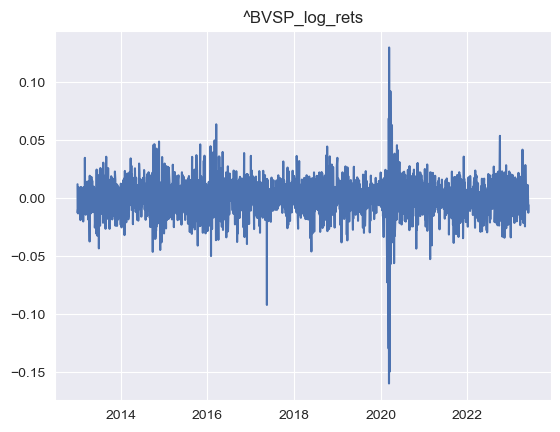

In [10]:
for column in log_rets_list:
    fig=df[column].plot(title=column).get_figure()
    fig.savefig(os.path.join(descriptivegraphsroute, "log_rets", f"{column}.png"))
    plt.close()

In [ ]:
for column in vol_list:
    fig=df[column].plot(title=column).get_figure()
    fig.savefig(os.path.join(descriptivegraphsroute, "gk_vol", f"{column}.png"))
    plt.close()

### Autocorrelograms

In [ ]:
acf_lags=252

In [ ]:
def save_acf(column, path):
    fig = plt.figure()
    ax1 = fig.add_subplot(1, 1, 1)
    plot_acf(df[column],
                lags=acf_lags,                 # Cuantos lags busco autocorrelacionar
                zero=False,                # Si tomo el lag cero
                alpha=0.05,                # El rango de certeza marcado en azul
                use_vlines=False,          # Lineas verticales que conectan cada punto con el eje x
                ax=ax1)                    # La posicion en la figura
    ax1.grid(True)
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Autocorrelation')
    ax1.set_title(f'Autocorrelation of {column}')
    fig.savefig(path)
    plt.close()


In [ ]:
for column in log_rets_list:
    save_acf(column, 
             os.path.join(
                 descriptivegraphsroute, 
                 "acf", "log_rets", f"{column}.png"))

In [ ]:
for column in vol_list:
    save_acf(column, 
             os.path.join(
                 descriptivegraphsroute, 
                 "acf", "gk_vol", f"{column}.png"))

In [ ]:
def save_pacf(column, path):
    """
    """
    fig = plt.figure(figsize=[13.6, 10.2])
    ax1 = fig.add_subplot(1, 1, 1)
    plot_pacf(df[column],
                method='ywa',                 # Metodo de Yule Walker con correccion de sesgo por autocovarianzas
                lags=acf_lags,                # Cuantos lags busco autocorrelacionar
                zero=False,                   # Si tomo el lag cero
                alpha=0.05,                   # El rango de certeza marcado en azul
                use_vlines=False,             # Lineas verticales que conectan cada punto con el eje x
                ax=ax1)                       # La posicion en la figura
    ax1.grid(True)
    ax1.set_xlabel('Lag')
    ax1.set_ylabel('Partial Autocorrelation')
    ax1.set_title(f'Partial Autocorrelation of {column}')

    fig.savefig(path)
    plt.close()

In [ ]:
for column in log_rets_list:
    save_pacf(column, 
             os.path.join(
                 descriptivegraphsroute, 
                 "pacf", "log_rets", f"{column}.png"))

In [ ]:
for column in vol_list:
    save_acf(column, 
             os.path.join(
                 descriptivegraphsroute, 
                 "pacf", "gk_vol", f"{column}.png"))

In [ ]:
def save_hist_normal(column, path):
    fig = plt.figure(figsize=[13.6, 5.1])
    ax1 = fig.add_subplot(1, 1, 1)

    sb.distplot(df[column].fillna(0),
                ax=ax1,
                hist=True,
                bins=int(np.ceil(np.log2(len(df[column].index)) + 15)),
                label='Observed data KDE',
                fit=norm,
                fit_kws = {"color":"r", "lw":3, "label":"Fitted Normal"})
    plt.legend()
    plt.grid(True)
    plt.xlabel('Log Returns')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for return frequency for {column}')
    fig.savefig(path)
    plt.close()

In [ ]:
for column in log_rets_list:
    save_hist_normal(
        column,
        os.path.join(
            descriptivegraphsroute, 
            "histograms", f"{column}.png"))

C:\Users\alfredo.sampron\AppData\Local\Temp\ipykernel_61372\2059545607.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[column].fillna(0),
C:\Users\alfredo.sampron\AppData\Local\Temp\ipykernel_61372\2059545607.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[column].fillna(0),
C:\Users

In [ ]:
for column in vol_list:
    save_hist_normal(
        column,
        os.path.join(
            descriptivegraphsroute, 
            "histograms", f"{column}.png"))

C:\Users\alfredo.sampron\AppData\Local\Temp\ipykernel_61372\2059545607.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[column].fillna(0),
C:\Users\alfredo.sampron\AppData\Local\Temp\ipykernel_61372\2059545607.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df[column].fillna(0),
C:\Users

In [ ]:
def analyze_skew_kurt(dataframe):
    results = pd.DataFrame(index=dataframe.columns, 
                           columns=['Skewness', 'Skewness P-Value', 'Kurtosis', 'Kurtosis P-Value', 'Normaltest Stat', 'Normaltest P-Value'])
    for column in dataframe.columns:
        skew_val, skew_pval = scs.skewtest(dataframe[column], nan_policy='omit')
        kurt_val, kurt_pval = scs.kurtosistest(dataframe[column], nan_policy='omit')
        normtest_stat, normtest_pval = scs.normaltest(dataframe[column], nan_policy='omit')
        results.loc[column] = [skew_val, skew_pval, kurt_val, kurt_pval, normtest_stat, normtest_pval]

    return results

In [ ]:
analyze_skew_kurt(df[log_rets_list].fillna(0))

,Skewness,Skewness P-Value,Kurtosis,Kurtosis P-Value,Normaltest Stat,Normaltest P-Value
^BVSP_log_rets,-15.851547,0.0,22.895619,0.0,775.480907,0.0
VALE3.SA_log_rets,-5.022832,0.000001,19.839429,0.0,418.831779,0.0
VALE_log_rets,2.028625,0.042497,15.770601,0.0,252.827184,0.0
PETR3.SA_log_rets,-15.372625,0.0,22.26213,0.0,731.920037,0.0
PBR_log_rets,-14.965208,0.0,21.298567,0.0,677.586424,0.0
EMBR3.SA_log_rets,-8.015645,0.0,23.028849,0.0,594.578465,0.0
ERJ_log_rets,-5.924948,0.0,21.221476,0.0,485.456041,0.0
ABEV3.SA_log_rets,-7.793259,0.0,20.499778,0.0,480.975782,0.0
ABEV_log_rets,-7.640824,0.0,19.064483,0.0,421.836693,0.0
USD_log_rets,-1.09474,0.273631,14.775399,0.0,219.510876,0.0
